<div style="border:solid green 2px; padding: 20px">

**Hello Andy,**

My name is **John Dickson** (https://hub.tripleten.com/u/13efa053) and today I'll be reviewing your project!

You’ll find specific notes inside the project file, marked green, yellow or red.


**Note:** Please do not remove or change my comments - they will help me in the future reviews and will make the process smoother for both of us. 

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment</b> 
    
Such comment will mark efficient solutions and good ideas that can be used in other projects. It will also point at the document formatting, which was done for you in this project, but you will need to do it yourself in the future ones.
</div>

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment</b> 
    
The parts marked with yellow comments indicate that there is room for optimisation. Though the correction is not necessary it is good if you implement it.
</div>

<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment</b> 
    
If you see such a comment, it means that there is a problem that needs to be fixed. Please note that I won't be able to accept your project until the issue is resolved.
</div>

---
    
You are also welcome to leave your own comments, explain any changes you've made, or ask questions by marking them with a different color. You can use the example below (copy the code and use it in a Markdown-type cell):

```
    
<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student’s Comment</b>

```
    
It will appear like this:
    
<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student’s Comment</b></div>
</div>

<div style="border:solid Purple 2px; padding: 20px">

V1  

<div style="border: 2px solid Green; padding: 5px; margin: 5px">
 
**What Was Great:**

- Great project overall, you had all the parts in at least some form.
- Loading and initial checks are good
- Checked class balance
- Encoding is done correctly

</div>
<div style="border: 2px solid red; padding: 5px; margin: 5px">

**What could be improved:**

- Fixing class imbalance - upsampling and downsampling - ensure that you don't cause significant class imbalance in the opposite direction when doing this.
- The models should be tuned for each method of fixing class imbalance.

</div>

---

Great project overall Andy, there are just a couple of small things to clean up to make the project better. Try to keep things organised in sections in a logical manner as you make the adjustments requested. 

<div style="border:solid Purple 2px; padding: 20px">

V2   

<div style="border: 2px solid Green; padding: 5px; margin: 5px">
 
**What Was Great:**

- Fixed class imbalance to create more balanced datasets with upsampling and downsampling
- Tuned the models for each method of fixing class imbalance

</div>
<div style="border: 2px solid red; padding: 5px; margin: 5px">

**What could be improved:**

- Introduced a lot of duplicate code, in particular the upsample and downsample functions are now repeated several times. 

</div>

---

Great work in the fixes to the previous problems, just make sure not to repeat function definitions, we need to define them only once and then we can call them whenever needed. 

<div style="border:solid Purple 2px; padding: 20px">

V3  

<div style="border: 2px solid Green; padding: 5px; margin: 5px">
 
**What Was Improved:**

- Duplicate code was removed.

</div>

---

Great work! Now the project looks a lot better, good luck with your next sprint!

Supervised Learning: Project
-

Project Description
-
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.

Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.

Additionally, measure the AUC-ROC metric and compare it with the F1.

Data Description
-
The data can be found in /datasets/Churn.csv file. Download the dataset.

Features
- RowNumber — data string index
- CustomerId — unique customer identifier
- Surname — surname
- CreditScore — credit score
- Geography — country of residence
- Gender — gender
- Age — age
- Tenure — period of maturation for a customer’s fixed deposit (years)
- Balance — account balance
- NumOfProducts — number of banking products used by the customer
- HasCrCard — customer has a credit card
- IsActiveMember — customer’s activeness
- EstimatedSalary — estimated salary

Target
- Exited — сustomer has left

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from joblib import dump
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

Data Preparation
-

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
#Checking dataframe and datasets
df.describe()
df.info()
df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment V1</b> 
    
Data loaded and we have got an overview of the data.
</div>

There are some missing values in Tenure.  I believe filling it with the mean value will be the best option since we will be calculating metrics such as MSE and RMSE.  I will also convert it to integer type.  I will also drop some columns that are unnecessary because it might affect the training algorthm.

In [4]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)
df['Tenure']= df['Tenure'].fillna(df['Tenure'].mean())
df['Tenure'] = df['Tenure'].astype(int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


New check seems like it is ready for the next step.

In [6]:
#Using OHE and splitting the Data
scaler = StandardScaler() 
df = pd.get_dummies(df, drop_first=True)
features = df.drop(columns=['Exited'])
target =  df['Exited']

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment V1</b> 
    
Features are one hot encoded.
</div>

In [7]:
#splitting the data 20% testing, 80% training
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.25, random_state=12345)
print(len(features_train))
print(len(target_train))
print(len(features_test))
print(len(target_test))
print(len(features_valid))
print(len(target_valid))

6000
6000
2000
2000
2000
2000


<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment V1</b> 
    
The test and validation sets are not the same size, think about how they can be split so they are the same size. 
</div>

Data split is changed so that validation and test data is the same size.

In [8]:
#Normalization of Values
features_train = features_train.copy()
features_valid = features_valid.copy() 

features_test = features_test.copy()


# Then proceed with normalization
normalize = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
scaler = StandardScaler()
scaler.fit(features_train[normalize])
features_train[normalize] = scaler.transform(features_train[normalize])
features_valid[normalize] = scaler.transform(features_valid[normalize])
features_test[normalize] = scaler.transform(features_test[normalize])

OHE was used because we are working with categorical variables.  Sample size split looks good and I also normalize the data scaling for some of the features that might come in handy in model training.

Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.
-

In [9]:
#Checking for class imbalance
print(df[df['Exited'] == 1]['Exited'].count())
print(df[df['Exited'] == 0]['Exited'].count())

2037
7963


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment V1</b> 
    
Correct!
</div>

Seems like we have imbalance of 1:4 ratio.  Lets proceed without taking into account this imbalance.

In [10]:
LogRegImbalanced = LogisticRegression(solver='liblinear', random_state=12345)
LogRegImbalanced.fit(features_train,target_train)
print('Accuracy', LogRegImbalanced.score(features_valid, target_valid))
print('f1 score:' ,f1_score(target_valid, LogRegImbalanced.predict(features_valid)))
print('AUC:', roc_auc_score(target_valid, LogRegImbalanced.predict_proba(features_valid)[:,1]))

Accuracy 0.8145
f1 score: 0.30131826741996237
AUC: 0.77053625784629


In [11]:
LogRegBalanced = LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced')
LogRegBalanced.fit(features_train,target_train)
print('Accuracy', LogRegBalanced.score(features_valid, target_valid))
print('f1 score:' ,f1_score(target_valid, LogRegBalanced.predict(features_valid)))
print('AUC:',roc_auc_score(target_valid, LogRegBalanced.predict_proba(features_valid)[:,1]))

Accuracy 0.7075
f1 score: 0.4772117962466488
AUC: 0.7726360195765825


We can see that when the classes are imbalanced, we have an F1 score of 0 which means the models fails to identify any positive cases, which means either precision or recall is at 0. Once we balance the classes, our F1 score goes up but accuracy drops.  AUC also goes up which is better than just random guessing when the classes are imbalanced.  I did not check Random Forest and Decision tree for the imbalanced data since their performance is massively lowered by imbalanced datasets.

Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.
-

In [12]:
#Upsampling

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

LogRegUpsamp = LogisticRegression(random_state=12345,solver='liblinear')
LogRegUpsamp.fit(features_upsampled, target_upsampled)
LogRegUpsamp_predicted_valid = LogRegUpsamp.predict(features_valid)

print('Accuracy', LogRegUpsamp.score(features_valid, target_valid))
print('f1 score:' ,f1_score(target_valid, LogRegUpsamp_predicted_valid))
print('AUC-ROC:',roc_auc_score(target_valid, LogRegUpsamp.predict_proba(features_valid)[:,1]))


Accuracy 0.7015
f1 score: 0.47585601404740996
AUC-ROC: 0.7726550938693635


<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment V1</b> 
    
<strike>We should check the balance again after we have upsampled and downsampled. In this case a significant imbalance has been created in the opposited direction.
</div>

<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment V2</b> 
    
<Strike>We don't need to define the upsample and downsample function repeatedly, they should each be defined once and then called each time you need them. 
</div>

Upsampling repeat value has been changed to 4 for better balancing.  Downsampling fraction has been changed to 0.25 for better balancing.

In [13]:
#Downsampling
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

LogRegDownsamp = LogisticRegression(random_state=12345,solver='liblinear')
LogRegDownsamp.fit(features_downsampled, target_downsampled)
LogRegDownsamp_predicted_valid = LogRegDownsamp.predict(features_valid)

print('Accuracy:', LogRegDownsamp.score(features_valid, target_valid))
print("F1 score:", f1_score(target_valid, LogRegDownsamp_predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, LogRegDownsamp.predict_proba(features_valid)[:,1]))

Accuracy: 0.7025
F1 score: 0.4757709251101322
AUC-ROC: 0.7737979619118164


We can see that both upsampling and downsampling have similar accuracy and f1 score of around 0.47 which is similar the built-in class balance function of Log Reg model.

In [14]:
#Decision Tree
depth_param = {'max_depth':range(1,25)}
DecisionTree = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
DecisionTree = GridSearchCV(DecisionTree,depth_param)
DecisionTree.fit(features_train, target_train)
print(DecisionTree.best_estimator_)
DecisionTree_predicted_valid = DecisionTree.predict(features_valid)

print('Accuracy:', DecisionTree.score(features_valid, target_valid))
print("F1 score:", f1_score(target_valid, DecisionTree_predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, DecisionTree.predict_proba(features_valid)[:,1]))

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       random_state=12345)
Accuracy: 0.7875
F1 score: 0.4640605296343001
AUC-ROC: 0.6680739256007211


In [15]:
#Decision Tree upsampling
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

depth_param = {'max_depth':range(1,25)}
DecisionTree = DecisionTreeClassifier(random_state=12345)
DecisionTree = GridSearchCV(DecisionTree,depth_param)
DecisionTree.fit(features_upsampled, target_upsampled)
print(DecisionTree.best_estimator_)
DecisionTree_predicted_valid = DecisionTree.predict(features_valid)

print('Accuracy:', DecisionTree.score(features_valid, target_valid))
print("F1 score:", f1_score(target_valid, DecisionTree_predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, DecisionTree.predict_proba(features_valid)[:,1]))

DecisionTreeClassifier(max_depth=20, random_state=12345)
Accuracy: 0.7945
F1 score: 0.471042471042471
AUC-ROC: 0.6716225388201595


In [16]:
#reviewer code
target_upsampled.value_counts()

1    4876
0    4781
Name: Exited, dtype: int64

In [17]:
#Decision Tree downsampling
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

depth_param = {'max_depth':range(1,25)}
DecisionTree = DecisionTreeClassifier(random_state=12345)
DecisionTree = GridSearchCV(DecisionTree,depth_param)
DecisionTree.fit(features_downsampled, target_downsampled)
print(DecisionTree.best_estimator_)
DecisionTree_predicted_valid = DecisionTree.predict(features_valid)

print('Accuracy:', DecisionTree.score(features_valid, target_valid))
print("F1 score:", f1_score(target_valid, DecisionTree_predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, DecisionTree.predict_proba(features_valid)[:,1]))

DecisionTreeClassifier(max_depth=5, random_state=12345)
Accuracy: 0.7255
F1 score: 0.5327659574468085
AUC-ROC: 0.8112384143540412


In [18]:
#Random Forest
depth_param = {'max_depth':range(1,10), 'n_estimators':range(1,50)}
RandomForest = RandomForestClassifier(random_state=12345, class_weight='balanced')
RandomForest = GridSearchCV(RandomForest, depth_param)
RandomForest.fit(features_train, target_train)
print(RandomForest.best_estimator_)
RandomForest_predicted_valid = RandomForest.predict(features_valid)

print('Accuracy', RandomForest.score(features_valid, target_valid))
print("F1 score:", f1_score(target_valid, RandomForest_predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, RandomForest.predict_proba(features_valid)[:,1]))

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=19,
                       random_state=12345)
Accuracy 0.822
F1 score: 0.5721153846153847
AUC-ROC: 0.8411906173553811


In [19]:
#Random Forest upsampling
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

depth_param = {'max_depth':range(1,10), 'n_estimators':range(1,50)}
RandomForest = RandomForestClassifier(random_state=12345)
RandomForest = GridSearchCV(RandomForest, depth_param)
RandomForest.fit(features_upsampled, target_upsampled)
print(RandomForest.best_estimator_)
RandomForest_predicted_valid = RandomForest.predict(features_valid)

print('Accuracy', RandomForest.score(features_valid, target_valid))
print("F1 score:", f1_score(target_valid, RandomForest_predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, RandomForest.predict_proba(features_valid)[:,1]))

RandomForestClassifier(max_depth=9, n_estimators=41, random_state=12345)
Accuracy 0.806
F1 score: 0.5754923413566738
AUC-ROC: 0.8509550657347815


In [20]:
#Random Forest downsampling
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

depth_param = {'max_depth':range(1,10), 'n_estimators':range(1,50)}
RandomForest = RandomForestClassifier(random_state=12345)
RandomForest = GridSearchCV(RandomForest, depth_param)
RandomForest.fit(features_downsampled, target_downsampled)
print(RandomForest.best_estimator_)
RandomForest_predicted_valid = RandomForest.predict(features_valid)

print('Accuracy', RandomForest.score(features_valid, target_valid))
print("F1 score:", f1_score(target_valid, RandomForest_predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, RandomForest.predict_proba(features_valid)[:,1]))

RandomForestClassifier(max_depth=8, n_estimators=31, random_state=12345)
Accuracy 0.772
F1 score: 0.549407114624506
AUC-ROC: 0.8357655705836257


Comparing all the models, we can see that Random Forest with upsampling yields the best accuracy and F1_score. We can take the max depth = 9 keep it constant while adding more identifiers and changing the number of estimators to see if we can continue to improve the model.

In [21]:
#Random Forest upsampling with max depth = 9
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

depth_param = {'n_estimators':range(1,200)}
RandomForest = RandomForestClassifier(max_depth=9, random_state=12345)
RandomForest = GridSearchCV(RandomForest, depth_param)
RandomForest.fit(features_upsampled, target_upsampled)
print(RandomForest.best_estimator_)
RandomForest_predicted_valid = RandomForest.predict(features_valid)

print('Accuracy', RandomForest.score(features_valid, target_valid))
print("F1 score:", f1_score(target_valid, RandomForest_predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, RandomForest.predict_proba(features_valid)[:,1]))

RandomForestClassifier(max_depth=9, n_estimators=113, random_state=12345)
Accuracy 0.8125
F1 score: 0.5856353591160222
AUC-ROC: 0.8539147601646111


We can see that with max depth = 9, estimators = 113 and upsampling, we have achieved a better F1 score.  But it is still not at the range we want. Lets do some threshold tuning and compare precision and recall to see if we can continue to improve our F1 score.

In [22]:
# Use your best upsampled Random Forest model
# Create upsampled data
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

# Train your best upsampled model (from cell 42)
rf_upsampled = RandomForestClassifier(max_depth=9, n_estimators=113, random_state=12345)
rf_upsampled.fit(features_upsampled, target_upsampled)

RandomForestClassifier(max_depth=9, n_estimators=113, random_state=12345)

In [23]:
# Get probabilities for threshold tuning
probabilities = rf_upsampled.predict_proba(features_valid)[:, 1]

# Test a wider range of thresholds
thresholds = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

print("Threshold Tuning Results:")
print("-" * 50)
best_f1 = 0
best_threshold = 0.5

for threshold in thresholds:
    predictions = (probabilities >= threshold).astype(int)
    f1 = f1_score(target_valid, predictions)
    precision = precision_score(target_valid, predictions)
    recall = recall_score(target_valid, predictions)
    
    print(f"Threshold {threshold:.2f}: F1={f1:.4f}, Precision={precision:.4f}, Recall={recall:.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold} with F1 score: {best_f1:.4f}")

Threshold Tuning Results:
--------------------------------------------------
Threshold 0.25: F1=0.4608, Precision=0.3061, Recall=0.9309
Threshold 0.30: F1=0.4968, Precision=0.3457, Recall=0.8824
Threshold 0.35: F1=0.5227, Precision=0.3829, Recall=0.8235
Threshold 0.40: F1=0.5499, Precision=0.4262, Recall=0.7749
Threshold 0.45: F1=0.5657, Precision=0.4653, Recall=0.7212
Threshold 0.50: F1=0.5856, Precision=0.5156, Recall=0.6777
Threshold 0.55: F1=0.5973, Precision=0.5665, Recall=0.6317
Threshold 0.60: F1=0.5976, Precision=0.6215, Recall=0.5754
Threshold 0.65: F1=0.5936, Precision=0.6928, Recall=0.5192
Threshold 0.70: F1=0.5732, Precision=0.7331, Recall=0.4706

Best threshold: 0.6 with F1 score: 0.5976


<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment V1</b> 
    
<strike>The models should be tuned with each method for dealing with imbalance, as the best hyperparameters will likely be different for each method. 
</div>

In [24]:
#Final Forest Model with threshold 0.6
# Create upsampled data
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

RandomForest = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=113)
RandomForest.fit(features_upsampled, target_upsampled)
RandomForest_predicted_valid = RandomForest.predict(features_valid)
def predict_with_threshold(model, X, threshold=0.60):
    probabilities = model.predict_proba(X)[:, 1]
    return (probabilities >= threshold).astype(int)

# Usage
predictions = predict_with_threshold(RandomForest, features_valid, 0.60)

print('Accuracy', RandomForest.score(features_valid, target_valid))
print("F1 score:", f1_score(target_valid, predictions))
print("AUC-ROC:", roc_auc_score(target_valid, RandomForest.predict_proba(features_valid)[:,1]))

Accuracy 0.8125
F1 score: 0.5976095617529881
AUC-ROC: 0.8539147601646111


After adjusting for threshold = 0.60, we can see that we have reached our project F1 score goal of > 0.59.  Although this model takes a long time to compute, it yields the best performance.  Next step is to do final testing with the testing data.

Perform the final testing.
-

In [25]:
# Create upsampled data
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

RandomForest = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=113)
RandomForest.fit(features_upsampled, target_upsampled)
RandomForest_predicted_valid = RandomForest.predict(features_test)
def predict_with_threshold(model, X, threshold=0.60):
    probabilities = model.predict_proba(X)[:, 1]
    return (probabilities >= threshold).astype(int)

# Usage
predictions_test = predict_with_threshold(RandomForest, features_test, 0.60)

print('Accuracy:', RandomForest.score(features_test, target_test))
print("F1 score:", f1_score(target_test, predictions_test))
print("AUC-ROC:", roc_auc_score(target_test, RandomForest.predict_proba(features_test)[:,1]))

Accuracy: 0.8255
F1 score: 0.6397058823529412
AUC-ROC: 0.8682256640527877


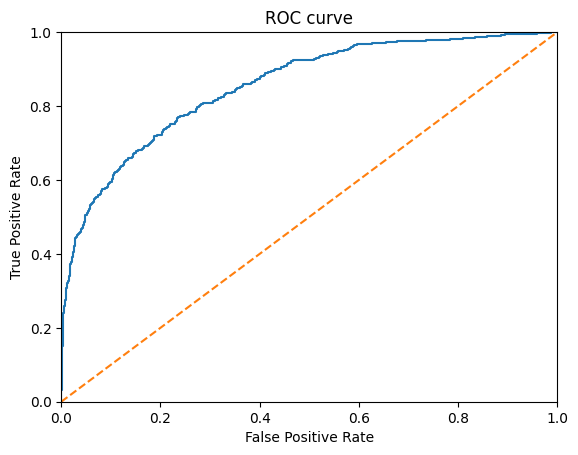

In [26]:
#Examining and ploting AUC-ROC
probabilities_valid = RandomForest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

We can see the deviation from the random model where our model performs much better.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment V1</b> 
    
Good work with the model testing and final conclusions. Be sure to come back to these if they change in the future. 
</div>

Conclusions
-

Like I mentioned before, if time is not an issue since the Random Forest model takes a long time to run, then our Random Forest Classifier is the best model with the following parameters and hyperparameters: 
- upsampling
- max_depth = 9
- n_estimators = 113
- threshold adjusted for 0.60 instead of default 0.5

This yields us a F1 score of 0.64 and AUC-ROC score of 0.87 for our test dataset. This meets project threshold and shows that the model quality functions well and meets what is required of the project.